# HW 2 Template

This code may (or may not!) be helpful in your first assignment.  Feel free to use it (or not).

## Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

This section provides some initialization commands, which can simply be copied for assignments.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# We need to import key libraries that we're going to use.  
# For now this is just numpy, which is our linear algebra library
import numpy as np

Setting the random seed for code reproducibility.

In [2]:
# to make this notebook's output stable across runs, we are going to see the random seed
np.random.seed(42)

Note that we have to reset the random seed _every_ time we run an algorithm if we want the same results!

We also want to set up a plotting environment and make it look pretty.  For those of you familiar with matlab, we will be using matplotlib which is fairly close in syntax and feel.  It's not too far off from R either.

In [3]:
# To plot pretty figures
import matplotlib.pyplot as plt
%matplotlib inline 
# This command figures show up in the notebook.  It's a "magic" command...
# Typically, this now happens by default so it is often an unnecessary command, but is good for standardization.
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

These commands will help us save figures; not going to go through them so much.

In [4]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "hw2"

In [5]:
# makes the directory if it doesn't exist.
import os
if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory didn\'t exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.') 

Figure directory exists.


In [6]:
# a simple defined helper function.
def savepdf(fig,name):
    fig.savefig(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR+'/'+name+'.pdf')

## Problem 3

This is a popular dataset on diabetes. Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [7]:
from sklearn import datasets, model_selection, linear_model, metrics
diabetes=datasets.load_diabetes(return_X_y=False)
X_train,X_valid,y_train,y_valid=\
    model_selection.train_test_split(diabetes['data'],diabetes['target'],random_state=42)

In [8]:
# Import relevant functions
from sklearn.metrics import mean_squared_error

In [9]:
# ridge vs lasso

n_alphas = 200
alphas = np.logspace(-4, 1, n_alphas)

# coefs = []
mse_ridge_train=[]
mse_ridge_valid=[]
mse_lasso_train=[]
mse_lasso_valid=[]
for a in alphas:
    ridge=linear_model.Ridge(alpha=a)
    lasso=linear_model.Lasso(alpha=a)
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    mse_ridge_train.append(\
            mean_squared_error(y_true=y_train,y_pred=ridge.predict(X_train)))
    mse_ridge_valid.append(\
            mean_squared_error(y_true=y_valid,y_pred=ridge.predict(X_valid)))
    mse_lasso_train.append(\
            mean_squared_error(y_true=y_train,y_pred=lasso.predict(X_train)))
    mse_lasso_valid.append(\
            mean_squared_error(y_true=y_valid,y_pred=lasso.predict(X_valid)))

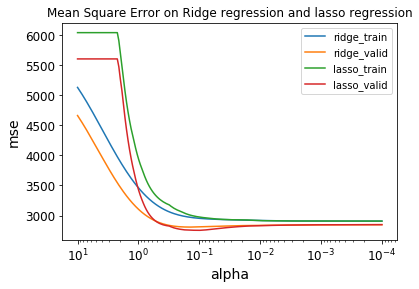

In [10]:
fig=plt.figure(figsize=[6,4])
ax = plt.gca()
plt.plot(alphas,mse_ridge_train, label='ridge_train')
plt.plot(alphas,mse_ridge_valid, label='ridge_valid')
plt.plot(alphas,mse_lasso_train, label='lasso_train')
plt.plot(alphas,mse_lasso_valid, label='lasso_valid')
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('mse')
plt.title('Mean Square Error on Ridge regression and lasso regression')
plt.axis('tight')
plt.show()

In [11]:
# use ridge regression
id = np.argmin(mse_ridge_valid)
print("min mse is {}".format(mse_ridge_valid[id]))
alpha = alphas[id]
print("choose alpah = {}".format(alpha))

min mse is 2807.779820524019
choose alpah = 0.13826221737646563


In [12]:
# use lasso regression
id = np.argmin(mse_lasso_valid)
print("min mse is {}".format(mse_lasso_valid[id]))
alpha = alphas[id]
print("choose alpah = {}".format(alpha))

min mse is 2753.8856808552746
choose alpah = 0.10353218432956626


In [13]:
# elastic net
alphas = np.logspace(-4, 1, 200)
l1_ratios = np.linspace(0.1, 1, num=10)

[i for i in range(3, 23)]
        
mse_elastic_valid = []
for a in alphas:
    for l in l1_ratios:
        elastic = linear_model.ElasticNet(alpha=a, l1_ratio=l)
        elastic.fit(X_train, y_train)
        mse_elastic_valid.append(\
            mean_squared_error(y_true=y_valid,y_pred=elastic.predict(X_valid)))


In [14]:
import numpy as np
a = np.array([i for i in range(3, 23)])
print(a)

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


120 9
choose alpha = 0.10353218432956626
choose l1_ratios = 1.0
when MSE reaches minimum (2754.0)


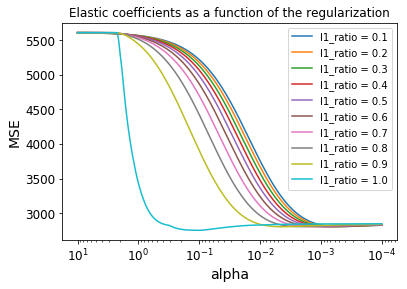

In [15]:
fig=plt.figure(figsize=[6,4])
ax = plt.gca()
z = np.array(mse_elastic_valid).reshape((len(alphas), len(l1_ratios)))

LMSE=np.min(mse_elastic_valid)
id_x, id_y = z.argmin()//z.shape[1], z.argmin()%z.shape[1]
print(id_x, id_y)
print('choose alpha = {}'.format(alphas[id_x]))
print('choose l1_ratios = {}'.format(l1_ratios[id_y]))
print(f'when MSE reaches minimum ({round(LMSE)})')

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) 
for i in range(1,11):
    plt.plot(alphas,z[:,i-1],label=f'l1_ratio = {round(l1_ratios[i-1],1)}')

plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Elastic coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Problem 4
Here we load a synthetic dataset and perform penalized regression on it

In [16]:
# import libs
import pandas as pd
from sklearn import metrics, preprocessing, pipeline

In [17]:
Xdf=pd.read_csv('hw2/hw2_problem_4_X.csv')
ydf=pd.read_csv('hw2/hw2_problem_4_y.csv')
Xdf_blind=pd.read_csv('hw2/hw2_problem_4_X_blind.csv')
X=np.array(Xdf.values[:,1:],dtype=np.float64)
y=np.array(ydf.values[:,1],dtype=np.float64)
X_blind=np.array(Xdf_blind.values[:,1:],dtype=np.float64)

X_train,X_valid,y_train,y_valid=\
    model_selection.train_test_split(X,y,random_state=42)

In [18]:
# type of scalers
std_scaler = preprocessing.StandardScaler()
minmax_scaler = preprocessing.MinMaxScaler()
maxabs_scaler = preprocessing.MaxAbsScaler()

In [19]:
# ridge with scaling
n_alphas = 300
alphas = np.logspace(-2, 1, n_alphas)
model_names=['No Scaling','Std','MinMax','MaxAbs']
mse = {'No Scaling':[],'Std':[],'MinMax':[],'MaxAbs':[]}
for a in alphas:
    ridge=linear_model.Ridge(alpha=a)
    pipe=pipeline.Pipeline([('scaler',std_scaler),('ridge',ridge)])
    
    models_to_compare=[ridge,\
                  pipeline.Pipeline([('scaler',std_scaler),('ridge',ridge)]),\
                  pipeline.Pipeline([('scaler',minmax_scaler),('ridge',ridge)]),\
                  pipeline.Pipeline([('scaler',maxabs_scaler),('ridge',ridge)])]
    
    for model,name in zip(models_to_compare,model_names):
        model.fit(X_train, y_train)
        mse[name].append(\
                mean_squared_error(y_true=y_valid,y_pred=model.predict(X_valid)))


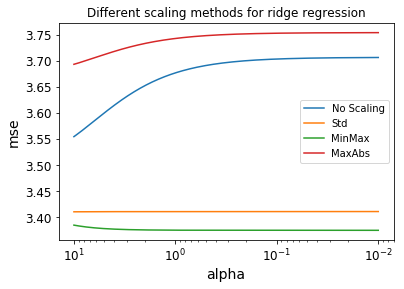

In [20]:
fig=plt.figure(figsize=[6,4])
ax = plt.gca()
for m in mse:
    plt.plot(alphas, mse[m], label=m)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('mse')
plt.title('Different scaling methods for ridge regression')
plt.axis('tight')
plt.show()


In [21]:
# choose MinMax scaling for ridge regression
min_id = np.argmin(mse['MinMax'])
print("min mse is {}".format(mse['MinMax'][min_id]))
q4_ridge_alpha = alphas[min_id]
print('choose alpha {}'.format(q4_ridge_alpha))

min mse is 3.375302306368465
choose alpha 0.01


In [22]:
# lasso with scaling
n_alphas = 300
alphas = np.logspace(-2.5, -1, n_alphas)
# alphas = np.arange(0.001, 0.1, 0.0005)
model_names=['No Scaling','Std','MinMax','MaxAbs']
mse = {'No Scaling':[],'Std':[],'MinMax':[],'MaxAbs':[]}
for a in alphas:
    lasso=linear_model.Lasso(alpha=a)
    pipe=pipeline.Pipeline([('scaler',std_scaler),('cls',lasso)])
    
    models_to_compare=[lasso,\
                  pipeline.Pipeline([('scaler',std_scaler),('lasso',lasso)]),\
                  pipeline.Pipeline([('scaler',minmax_scaler),('lasso',lasso)]),\
                  pipeline.Pipeline([('scaler',maxabs_scaler),('lasso',lasso)])]
    
    for model,name in zip(models_to_compare, model_names):
        model.fit(X_train, y_train)
        mse[name].append(\
                mean_squared_error(y_true=y_valid, y_pred=model.predict(X_valid)))

KeyboardInterrupt: 

In [ ]:

fig=plt.figure(figsize=[6,4])
ax = plt.gca()
for k in mse:
    plt.plot(alphas, mse[k], label=k)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('mse')
plt.title('Different scaling methods for lasso regression')
plt.axis('tight')
plt.show()

In [ ]:
# choose MinMax scaling for ridge regression
min_id = np.argmin(mse['MinMax'])
print("min mse is {}".format(mse['MinMax'][min_id]))
q4_ridge_alpha = alphas[min_id]
print('choose alpha {}'.format(q4_ridge_alpha))

In [ ]:
# let's recompute valid mse to compare best ridge model with lasso model
ridge = linear_model.Ridge(alpha=0.01)
lasso = linear_model.Lasso(alpha=0.024)
ridge_pipe = pipeline.Pipeline([('scaler',minmax_scaler),('ridge',ridge)])
lasso_pipe = pipeline.Pipeline([('scaler',minmax_scaler),('lasso',lasso)])
ridge_pipe.fit(X_train, y_train)
lasso_pipe.fit(X_train, y_train)
ridge_valid_mse = mean_squared_error(y_true=y_valid, y_pred=ridge_pipe.predict(X_valid))
lasso_valid_mse = mean_squared_error(y_true=y_valid, y_pred=lasso_pipe.predict(X_valid))
print(ridge_valid_mse, lasso_valid_mse)

In [ ]:
# so we will use lasso model with MinMax scaler to predict the blind data
y_blind_predicted = lasso_pipe.predict(X_blind)

When you're ready to make predictions and save them.

In [ ]:
Xdf=pd.DataFrame(y_blind_predicted)
Xdf.to_csv('./answers/hw2_problem_4_y_blind_predicted.csv')

## Problem 5
Here we load a synthetic dataset and perform kNN classification on it

In [23]:
from sklearn import feature_selection, neighbors

Xdf=pd.read_csv('hw2/hw2_problem_5_X.csv')
ydf=pd.read_csv('hw2/hw2_problem_5_y.csv')
Xdf_blind=pd.read_csv('hw2/hw2_problem_5_X_blind.csv')
X=np.array(Xdf.values[:,1:],dtype=np.float64)
y=np.array(ydf.values[:,1],dtype=np.float64)
X_blind=np.array(Xdf_blind.values[:,1:],dtype=np.float64)

X_train,X_valid,y_train,y_valid=\
    model_selection.train_test_split(X,y,random_state=42)

In [24]:

n_feature_set = np.arange(1, 30)
n_neighbor_set = np.arange(1, 30)
acc_uni=[]

for k in n_neighbor_set:
    for n in n_feature_set:
        cls=neighbors.KNeighborsClassifier(n_neighbors=k)
        uni=feature_selection.SelectKBest(k=n)
        pipe =pipeline.Pipeline([('fs',uni),('cls',cls)])
        pipe.fit(X_train,y_train)
        acc=metrics.accuracy_score(y_valid,pipe.predict(X_valid))
        acc_uni.append(acc)

acc_uni_matrix = np.array(acc_uni).reshape((len(n_feature_set), len(n_neighbor_set)))

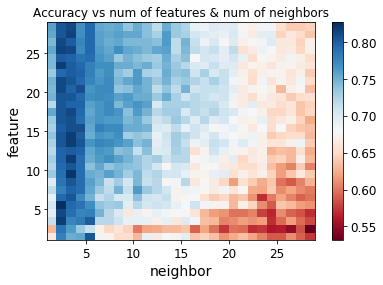

In [25]:

fig=plt.figure(figsize=[6,4])
ax = plt.gca()
c = ax.pcolormesh(n_neighbor_set, n_feature_set, acc_uni_matrix, cmap='RdBu')
fig.colorbar(c, ax=ax)
plt.xlabel('neighbor')
plt.ylabel('feature')
plt.title('Accuracy vs num of features & num of neighbors')
plt.axis('tight')
plt.show()

In [26]:
# get the num of neighbors and features with maximum accuracy 
ind = np.unravel_index(np.argmax(acc_uni_matrix, axis=None), acc_uni_matrix.shape)
print(ind)

print(acc_uni_matrix[ind[0]][ind[1]])

print("select {} features and {} neighbors".format(n_feature_set[ind[0]], n_neighbor_set[ind[1]]))

(4, 1)
0.8262411347517731
select 5 features and 2 neighbors


In [27]:
# predict on blind data
q5_model = neighbors.KNeighborsClassifier(n_neighbors=2)
q5_uni = feature_selection.SelectKBest(k=5)
pipe =pipeline.Pipeline([('fs',uni),('cls',cls)])
pipe.fit(X_train,y_train)
y_blind_predicted = pipe.predict(X_blind)

When you're ready to make predictions and save them.

In [28]:
Xdf=pd.DataFrame(y_blind_predicted)
Xdf.to_csv('./answers/hw2_problem_5_y_blind_predicted.csv')